In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

import nltk.data
nltk.download("punkt")

from urllib.request import urlopen
from sklearn.metrics.pairwise import cosine_similarity

%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# We can simply use a pre-trained TensorFLow model downloaded from TensorHub:
# Import the Universal Sentence Encoder's TF Hub module
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
embed = hub.Module(module_url)

In [8]:
from google.colab import files

uploaded = files.upload()

Saving df_1000p_words_index.csv to df_1000p_words_index.csv


In [10]:
ls

df_1000p_words_index.csv  sample_data/


In [11]:
df_1000p_words = pd.read_csv("df_1000p_words_index.csv")
df_1000p_words.head()

,actor_id,actor_name,words,words_index
0,nm0005211,Danica McKellar,danica mckellarmckellar 2018u. . nation book f...,"[3759, 2074, 6972, 16428, 8561, 15525, 18641, ..."
1,nm0005576,Drea de Matteo,drea de matteod matteo 2005bornandrea donna de...,"[334, 334, 6972, 1401, 18732, 15525, 5545, 179..."
2,nm0028846,Shawn Andrews,"american footbal guard tackl actor , see shawn...","[16144, 5693, 1291, 14329, 15044, 9403, 4235, ..."
3,nm0036571,Monica,"look monica monica wiktionari , free dictionar...","[19323, 13774, 13774, 2359, 13774, 4500, 14745..."
4,nm0038875,John Asher,thi biographi live person need addit citat ver...,"[15599, 13821, 660, 2746, 11661, 15058, 11742,..."


In [0]:
# Use the "punkt" sentence tokenizers to chop the words up into sentences.

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [0]:
temp_df = df_1000p_words.copy()

temp_df['words_to_sentences'] = temp_df['words']

for row in range(temp_df.shape[0]):
    temp_df['words_to_sentences'][row] = tokenizer.tokenize(temp_df['words_to_sentences'][row])

In [0]:
# print(temp_df.words_to_sentences[0])

In [0]:
all_words_to_sentences = temp_df.words_to_sentences.values

In [15]:
temp_df.shape[0]

1000

In [19]:

try_df = temp_df.copy()

temp_df['pp_embeddings'] = temp_df['words_to_sentences']

# for row in range(temp_df.shape[0]):
for row in range(20):
  
  words_to_sentences = temp_df.pp_embeddings[row]
  
  with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    pp_embeddings = session.run(embed(words_to_sentences))

  temp_df['pp_embeddings'][row] = pp_embeddings
  print(f'no. {row} row')
#   print(temp_df['pp_embeddings'][0])
#   break


no. 0 row
no. 1 row
no. 2 row
no. 3 row
no. 4 row
no. 5 row
no. 6 row
no. 7 row
no. 8 row
no. 9 row
no. 10 row
no. 11 row
no. 12 row
no. 13 row
no. 14 row
no. 15 row
no. 16 row
no. 17 row
no. 18 row
no. 19 row


In [20]:
pp_embeddings_first_20 = temp_df['pp_embeddings'][:20]
pp_embeddings_first_20

0     [[-0.047156405, 0.01899436, -0.034690164, -0.0...
1     [[0.043562658, 0.024041314, 0.049323823, 0.038...
2     [[0.065747365, -0.0075457455, -0.029403334, -0...
3     [[-0.018294502, 0.076964654, -0.012073838, 0.0...
4     [[0.012597141, -0.0020498405, -0.025142815, 0....
5     [[0.0609566, -0.02406519, 0.043375194, -0.0424...
6     [[-0.026972977, 0.044380806, 0.048289392, -0.0...
7     [[0.029027678, 0.022584343, 0.044650145, -0.04...
8     [[0.0003151019, 0.029980876, 0.051650416, 0.01...
9     [[0.04215754, 0.01368538, 0.056755528, -0.0424...
10    [[-0.0043760464, -0.026603213, 0.03966429, -0....
11    [[0.043173023, -0.012538917, 0.0020946339, 0.0...
12    [[0.07238706, -0.057789836, -0.016509831, 0.02...
13    [[0.058613412, -0.0013973314, 0.04147741, 0.00...
14    [[0.06926686, 0.03582366, -0.024751429, 0.0252...
15    [[0.008924246, 0.024368098, 0.055778094, -0.03...
16    [[0.0577102, 0.0044752206, 0.06213377, -0.0256...
17    [[-0.022661056, -0.041508965, -0.051653486

In [23]:
type(pp_embeddings_first_20)

pandas.core.series.Series

In [0]:
# similarity = cosine_similarity( pp_embeddings_first_20.values )

# fig, ax = plt.subplots(figsize=(10,8))

# sns.heatmap(similarity[0:1000,0:1000], ax=ax)
# ax.set_title("Cosine similarity of first 1000 sentences in Pride and Prejudice")

# clustering using sentence embeddings

* Clustering sentences using contextual sentence embeddings, t-sne, and agglomerative clustering.

In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(verbose=5)

In [39]:
pp_embeddings_first_20[0].shape, pp_embeddings_first_20[1].shape, pp_embeddings_first_20[2].shape

((361, 512), (24, 512), (408, 512))

In [0]:
from sklearn.cluster import AgglomerativeClustering

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 361 samples in 0.004s...
[t-SNE] Computed neighbors for 361 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 361 / 361
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 43.9719810, gradient norm = 0.5329259 (50 iterations in 0.092s)
[t-SNE] Iteration 100: error = 41.4286919, gradient norm = 0.5372398 (50 iterations in 0.087s)
[t-SNE] Iteration 150: error = 40.7914429, gradient norm = 0.5169896 (50 iterations in 0.080s)
[t-SNE] Iteration 200: error = 40.9134674, gradient norm = 0.5292195 (50 iterations in 0.087s)
[t-SNE] Iteration 250: error = 39.3714714, gradient norm = 0.5246095 (50 iterations in 0.077s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.371471
[t-SNE] Iteration 300: error = 0.0438523, gradient norm = 0.0021865 (50 iterations in 0.062s)
[t-SNE] Iteration 350: error = 0.0216304, gradient norm = 0.0001395 (

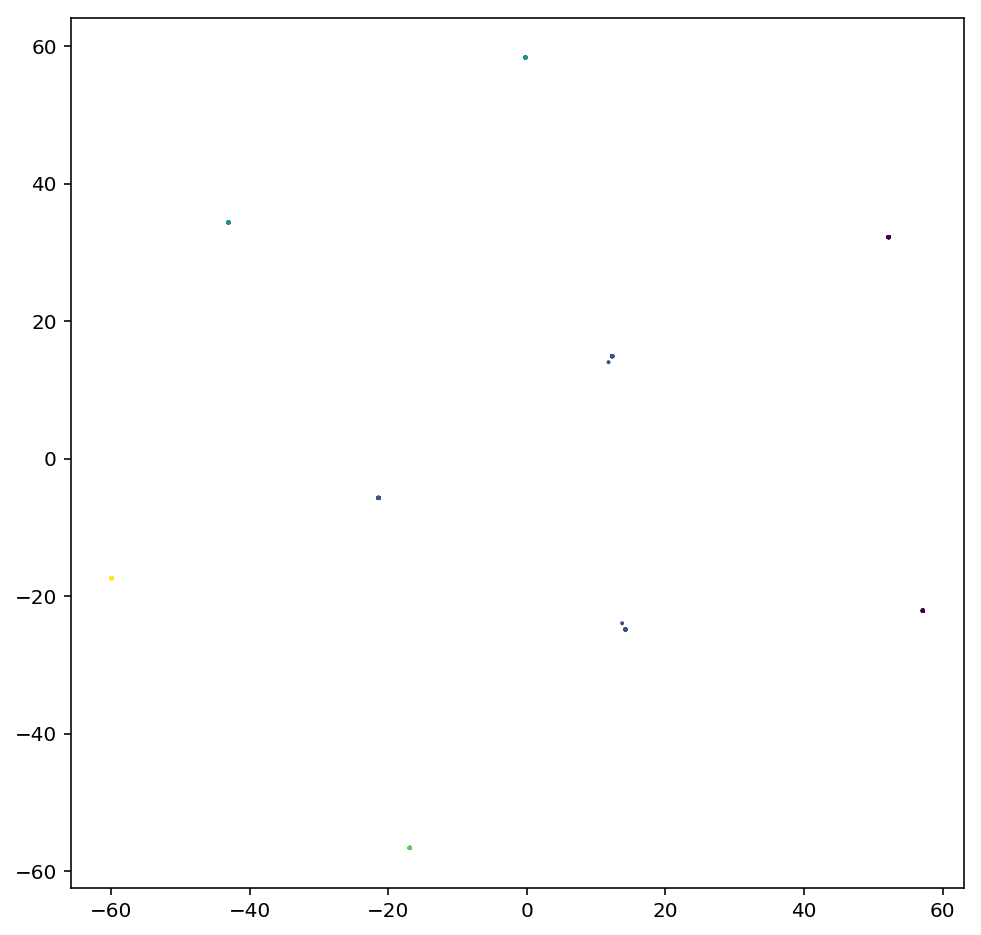

In [49]:
squish_0 = tsne.fit_transform(pp_embeddings_first_20[0])

clusterer = AgglomerativeClustering(n_clusters=5, linkage="ward")

cluster = clusterer.fit_predict( squish_0 )

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( *squish_0.T, s=1.0, c=cluster )

[t-SNE] Computing 23 nearest neighbors...
[t-SNE] Indexed 24 samples in 0.000s...
[t-SNE] Computed neighbors for 24 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 24 / 24
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 46.5760384, gradient norm = 0.5769849 (50 iterations in 0.010s)
[t-SNE] Iteration 100: error = 44.0122070, gradient norm = 0.6386795 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 47.4125290, gradient norm = 0.5300064 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 42.7490921, gradient norm = 0.3980464 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 42.7226830, gradient norm = 0.5572729 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.722683
[t-SNE] Iteration 300: error = 0.4943349, gradient norm = 0.0008537 (50 iterations in 0.010s)
[t-SNE] Iteration 350: error = 0.4536883, gradient norm = 

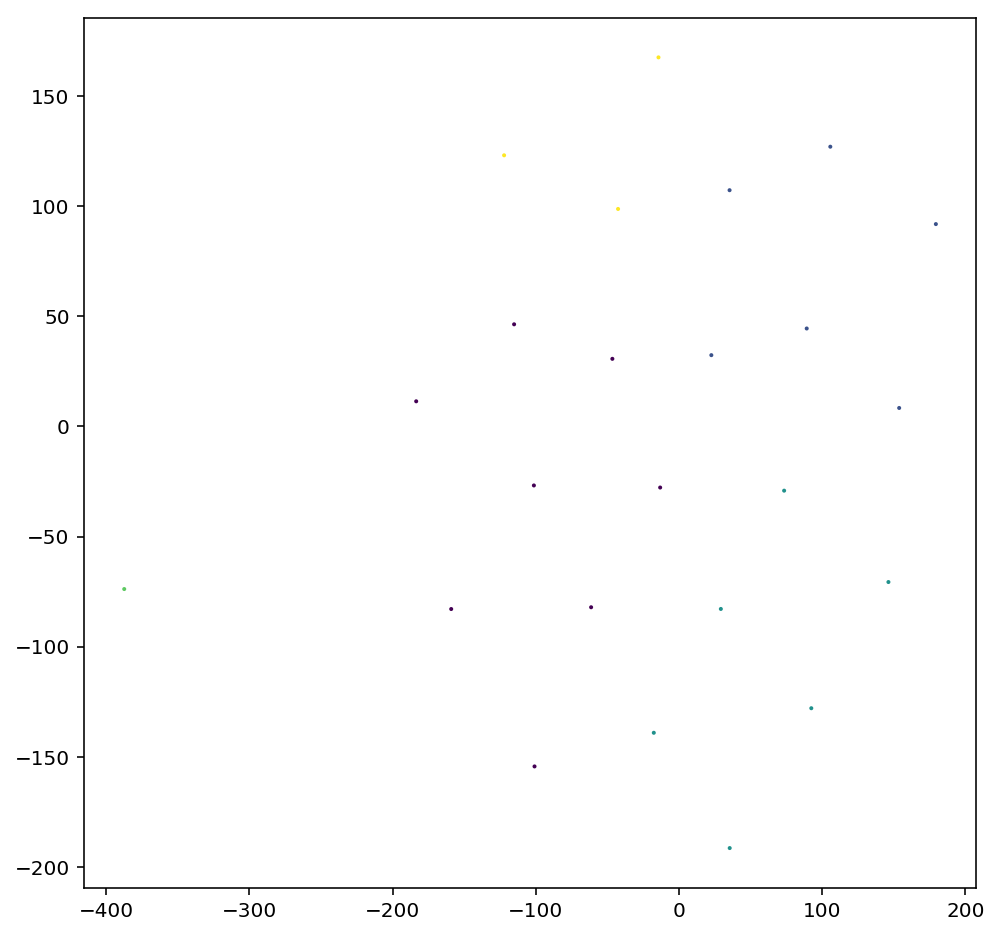

In [52]:
squish_1 = tsne.fit_transform(pp_embeddings_first_20[1])

clusterer = AgglomerativeClustering(n_clusters=5, linkage="ward")

cluster = clusterer.fit_predict( squish_1 )

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( *squish_1.T, s=1.0, c=cluster )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 408 samples in 0.004s...
[t-SNE] Computed neighbors for 408 samples in 0.129s...
[t-SNE] Computed conditional probabilities for sample 408 / 408
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.065s
[t-SNE] Iteration 50: error = 41.1666946, gradient norm = 0.5094502 (50 iterations in 0.111s)
[t-SNE] Iteration 100: error = 41.1670380, gradient norm = 0.4914663 (50 iterations in 0.106s)
[t-SNE] Iteration 150: error = 38.8947792, gradient norm = 0.4963217 (50 iterations in 0.108s)
[t-SNE] Iteration 200: error = 38.1452026, gradient norm = 0.5088148 (50 iterations in 0.095s)
[t-SNE] Iteration 250: error = 37.6013184, gradient norm = 0.5177261 (50 iterations in 0.094s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.601318
[t-SNE] Iteration 300: error = 0.0347790, gradient norm = 0.0012760 (50 iterations in 0.087s)
[t-SNE] Iteration 350: error = 0.0170277, gradient norm = 0.0001312 (

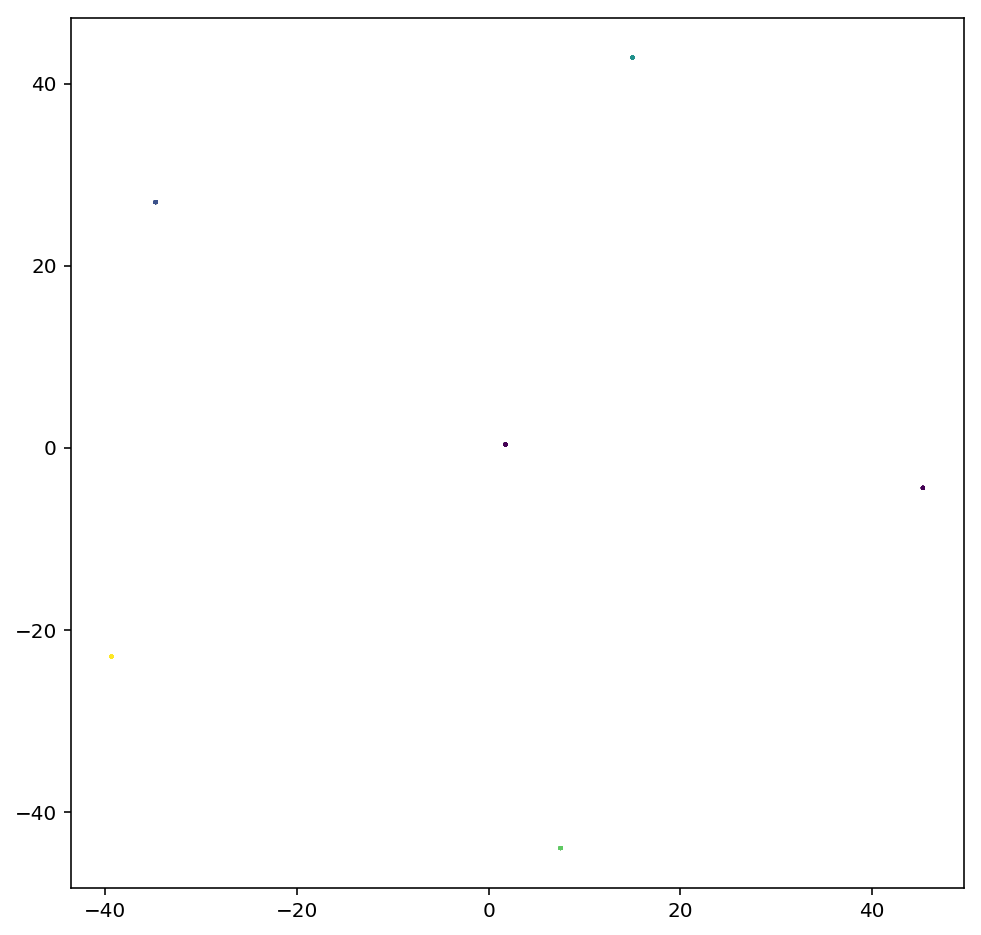

In [53]:
squish_2 = tsne.fit_transform(pp_embeddings_first_20[2])

clusterer = AgglomerativeClustering(n_clusters=5, linkage="ward")

cluster = clusterer.fit_predict( squish_2 )

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( *squish_2.T, s=1.0, c=cluster )